In [51]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.insert(0,'/home/pawel1/Pulpit/Astrophysics/CTA/soft/ctapipe_io_lst')
sys.path.insert(0, '/home/pawel1/Pulpit/Astrophysics/CTA/cta-lstchain')

from ctapipe_io_lst import LSTEventSource
from traitlets.config.loader import Config 
from ctapipe.instrument import CameraGeometry
from ctapipe.visualization import CameraDisplay
from ctapipe.image.extractor import LocalPeakWindowSum

from lstchain.calib.camera.r0 import LSTR0Corrections

from pulse_correction import PulseCorrection
from simple_extracor import extract_pulse_time

plt.rcParams['font.size'] = 30

In [52]:
def format_axes(ax):
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.tick_params(
    axis='x',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
    ax.tick_params(
    axis='y',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
    #ax.set_title("Kamera LST")
    ax.set_title("")
    return ax


In [2]:
config_corr = Config({
    "LSTR0Corrections": {
        "pedestal_path": "/media/pawel1/ADATA HD330/20190215/pedestal_run97_new.fits",
        "offset":  400}
})

hf = h5py.File('coeff_run250_n_harm_16.h5', 'r')
#hf = h5py.File('coeff_run171_n_harm_16.h5', 'r')
fan = hf.get('fan')
fan_array = np.array(fan)
fbn = hf.get('fbn')
fbn_array = np.array(fbn)
hf.close()

In [3]:
input_file_2 = "/media/pawel1/ADATA HD330/20190312/LST-1.*.Run00252.0000.fits.fz"
#input_file_2 = "/media/pawel1/ADATA HD330/20190226/LST-1.*.Run00171.0001.fits.fz"
N_events = 1000
reader = LSTEventSource(input_url=input_file_2, max_events=N_events)
lst_r0 = LSTR0Corrections(config=config_corr)

n_harm = 16
pulse_corr = PulseCorrection(fan_array, fbn_array, n_harm)

for i, ev in enumerate(reader):
    print(i)
        
    lst_r0.calibrate(ev)
    pulse_corr.corr_pulse(ev)

0
1
2
3
4
Weights sum to zero, can't be normalized
5
6
7
8
Weights sum to zero, can't be normalized
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
Weights sum to zero, can't be normalized
63
64
65
66
Weights sum to zero, can't be normalized
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
Weights sum to zero, can't be normalized
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
Weights sum to zero, can't be normalized
135
136
137
138
139
140
141
142
143
144
145
146
Weights sum to zero, can't be normalized
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
Weights sum to zero, can't be normalized
190
191
192
193
194
19

In [4]:
raw_pulse_list = pulse_corr.get_raw_pulse_list()
corr_pulse_list = pulse_corr.get_corr_pulse_list()
corr_mean_pulse_list = pulse_corr.get_corr_mean_pulse_list()


In [23]:
reader = LSTEventSource(input_url=input_file_2, max_events=10)
lst_r0 = LSTR0Corrections(config=config_corr)

for i, ev in enumerate(reader):
    print(i)
    lst_r0.calibrate(ev)

0
1
2
3
4
5
6
7
8
9


In [5]:
extractor = LocalPeakWindowSum()

In [24]:
charge, pulse = extractor(ev.r1.tel[0].waveform[:, :, 2:38] - 380)
pulse = extract_pulse_time(ev.r1.tel[0].waveform[0, :, 2:38] - 380)

In [28]:
good_pixels_id = np.where(charge[0, :]>3000)

In [29]:
bad_pixels_id = np.where(charge[0, :]<3000)

In [30]:
good_pixels_id[0]

array([   0,    1,    2, ..., 1852, 1853, 1854])

In [31]:
bad_pixels_id

(array([ 534,  616,  618,  619,  620,  703,  704,  710,  711,  712,  797,
         808,  809,  810,  838,  839,  896,  897,  912,  913,  914,  941,
         942,  943, 1002, 1022, 1023, 1024, 1025, 1027, 1051, 1052, 1113,
        1114, 1139, 1140, 1141, 1231, 1262, 1269, 1270, 1271, 1355, 1389,
        1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1484, 1494, 1495,
        1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1601, 1611,
        1613, 1633, 1634, 1635, 1636, 1637, 1638, 1699, 1711, 1712, 1729,
        1730, 1731, 1732, 1801, 1802]),)

In [32]:
good_pixels_list = []
for pix_id in good_pixels_id[0]:
    
    if np.sum(np.array(corr_mean_pulse_list[pix_id]) > 4) or np.sum(np.array(corr_mean_pulse_list[pix_id]) < -4):
        print(pix_id)
    else:
        good_pixels_list.append(pix_id)

449
584
585
651
652
670
671
672
696
697
742
743
744
763
764
790
791
792
840
841
891
892
951
952
1060
1061
1062
1176
1177
1612


2.056735461847763
1.0272911926501591
0.4380521493260784


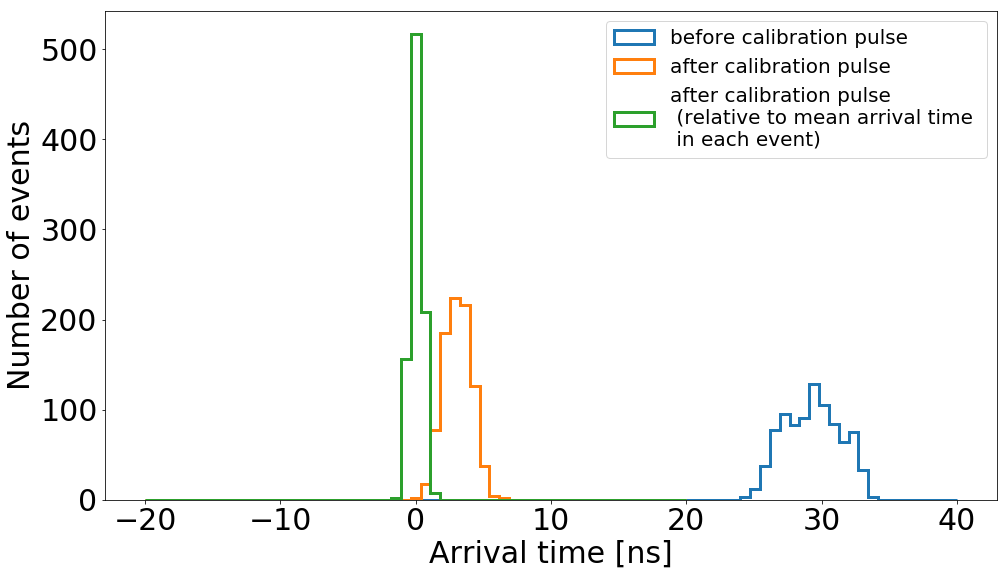

In [64]:
pixel_i = 1590
plt.figure(figsize=(16, 9))
plt.hist(raw_pulse_list[pixel_i], bins=55, range=(0, 40), histtype='step',lw=3, 
        label="before calibration pulse")
plt.hist(corr_pulse_list[pixel_i], bins=55, range=(-20, 20), histtype='step',lw=3,
         label="after calibration pulse")
plt.hist(corr_mean_pulse_list[pixel_i], bins=55, range=(-20, 20), histtype='step',lw=3,
        label="after calibration pulse \n (relative to mean arrival time \n in each event)")
plt.xlabel("Arrival time [ns]")
plt.ylabel("Number of events")
plt.legend(fontsize=20)
#plt.xlim([-5, 20])


print(np.std(raw_pulse_list[pixel_i]))
print(np.std(corr_pulse_list[pixel_i]))
print(np.std(corr_mean_pulse_list[pixel_i]))
plt.show()

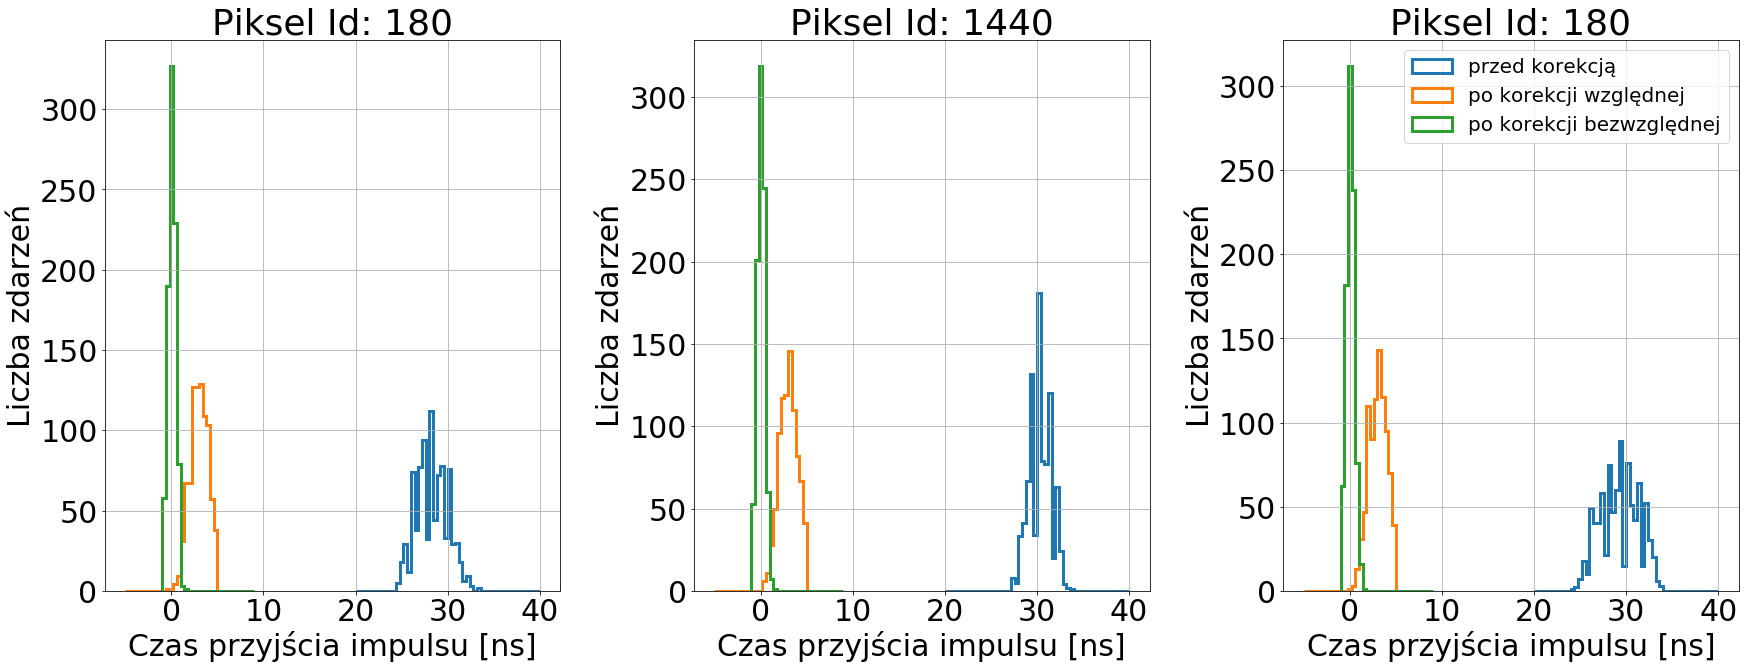

In [82]:
plt.figure(figsize=(25,10)) 

plt.subplot(1,3,1) 
plt.hist(raw_pulse_list[180], bins=50, range=(20, 40), histtype='step',lw=3, 
        label="przed korekcją")
plt.hist(corr_pulse_list[180], bins=25, range=(-5, 5), histtype='step',lw=3,
         label="po korekcji względnej")
plt.hist(corr_mean_pulse_list[180], bins=25, range=(-1, 9), histtype='step',lw=3,
        label="po korekcji bezwzględnej")
plt.xlabel("Czas przyjścia impulsu [ns]")
plt.ylabel("Liczba zdarzeń")
plt.title("Piksel Id: 180")
plt.grid(True)

plt.subplot(1,3,2) 
plt.hist(raw_pulse_list[1440], bins=50, range=(20, 40), histtype='step',lw=3, 
        label="przed korekcją")
plt.hist(corr_pulse_list[1440], bins=25, range=(-5, 5), histtype='step',lw=3,
         label="po korekcji względnej")
plt.hist(corr_mean_pulse_list[1440], bins=25, range=(-1, 9), histtype='step',lw=3,
        label="po korekcji bezwzględnej")
plt.xlabel("Czas przyjścia impulsu [ns]")
plt.ylabel("Liczba zdarzeń")
plt.title("Piksel Id: 1440")
plt.grid(True)

plt.subplot(1,3,3) 
plt.hist(raw_pulse_list[1590], bins=50, range=(20, 40), histtype='step',lw=3, 
        label="przed korekcją")
plt.hist(corr_pulse_list[1590], bins=25, range=(-5, 5), histtype='step',lw=3,
         label="po korekcji względnej")
plt.hist(corr_mean_pulse_list[1590], bins=25, range=(-1, 9), histtype='step',lw=3,
        label="po korekcji bezwzględnej")
plt.xlabel("Czas przyjścia impulsu [ns]")
plt.ylabel("Liczba zdarzeń")
plt.title("Piksel Id: 180")
plt.grid(True)

plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig("/home/pawel1/Pulpit/Astrophysics/Praca Magisterska/wykresy/drs4/time_corr_hist_3pixels.pdf")

plt.show()

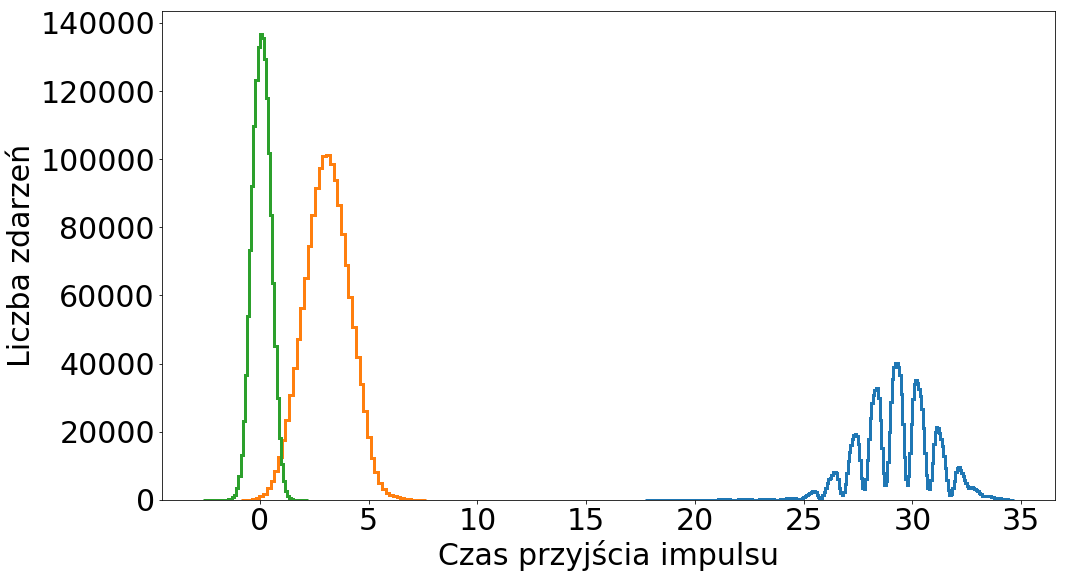

In [56]:

raw_pulse_all = []
corr_pulse_all = []
corr_pulse_mean_all = []
for i in good_pixels_list:
    raw_pulse_all.extend(raw_pulse_list[i])
    corr_pulse_all.extend(corr_pulse_list[i])
    corr_pulse_mean_all.extend(corr_mean_pulse_list[i])

clean_corr_pulse_all = [x for x in corr_pulse_all if str(x) != 'nan']    
clean_corr_mean_pulse_all = [x for x in corr_pulse_mean_all if str(x) != 'nan']   



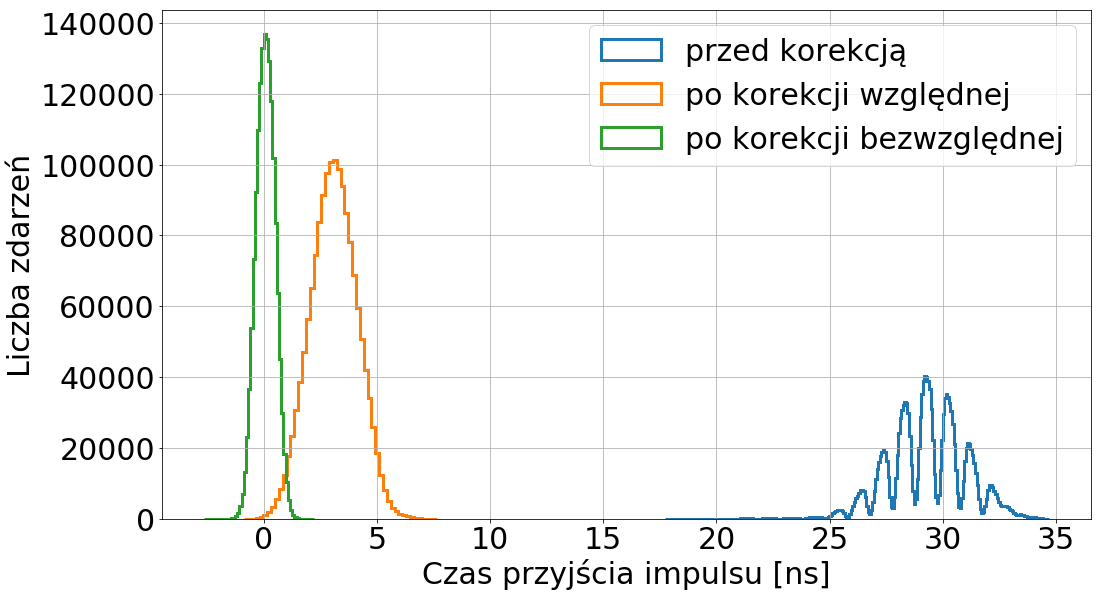

In [72]:
plt.figure(figsize=(16, 9))
plt.hist(raw_pulse_all, histtype="step", lw=3, bins=250, label="przed korekcją")
plt.hist(clean_corr_pulse_all, histtype="step", lw=3, bins=50, label="po korekcji względnej")
plt.hist(clean_corr_mean_pulse_all, histtype="step", lw=3, bins=50, label="po korekcji bezwzględnej")
#plt.yscale('log')
plt.xlabel("Czas przyjścia impulsu [ns]")
plt.ylabel("Liczba zdarzeń")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("/home/pawel1/Pulpit/Astrophysics/Praca Magisterska/wykresy/drs4/time_corr_hist_all.pdf")
plt.show()

In [34]:
print(np.std(raw_pulse_all))
print(np.std(clean_corr_pulse_all))
print(np.std(clean_corr_mean_pulse_all))

1.7067172819736738
1.0314932451951297
0.4149783521235131


In [35]:
status_pixels = np.zeros(1855)

for i in good_pixels_list:
    status_pixels[i] = 1

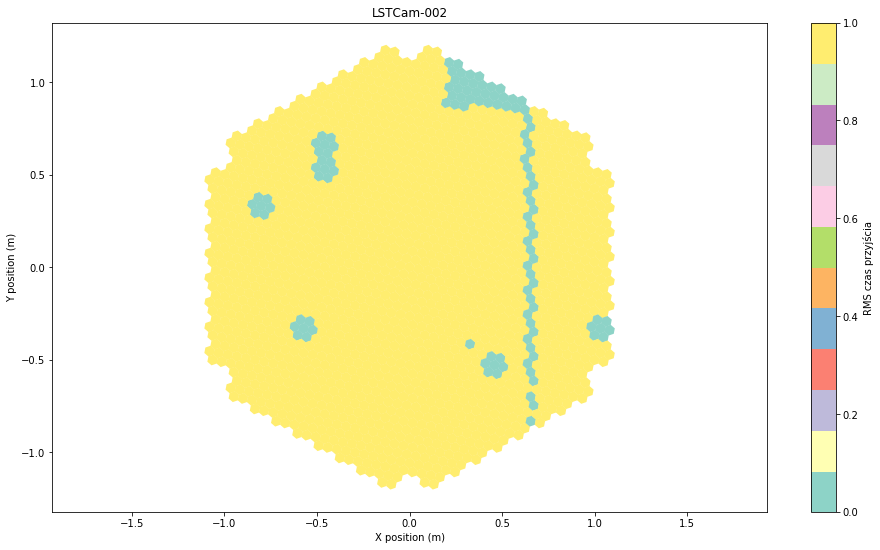

In [36]:
fig, ax = plt.subplots(figsize=(16,9))

disp0 = CameraDisplay(ev.inst.subarray.tels[0].camera, ax=ax)
disp0.cmap = 'Set3'
disp0.image = status_pixels
disp0.add_colorbar(ax=ax, label="RMS czas przyjścia")


In [37]:
std_raw_pulse = []
std_corr_pulse = []
std_corr_mean_pulse = []
for pixel_id in good_pixels_list:
    std_arrival = np.std(raw_pulse_list[pixel_id])
    std_corr_arrival = np.std(corr_pulse_list[pixel_id])
    std_corr_mean_arrival = np.std(corr_mean_pulse_list[pixel_id])
    std_raw_pulse.append(std_arrival)
    std_corr_pulse.append(std_corr_arrival)
    std_corr_mean_pulse.append(std_corr_mean_arrival)

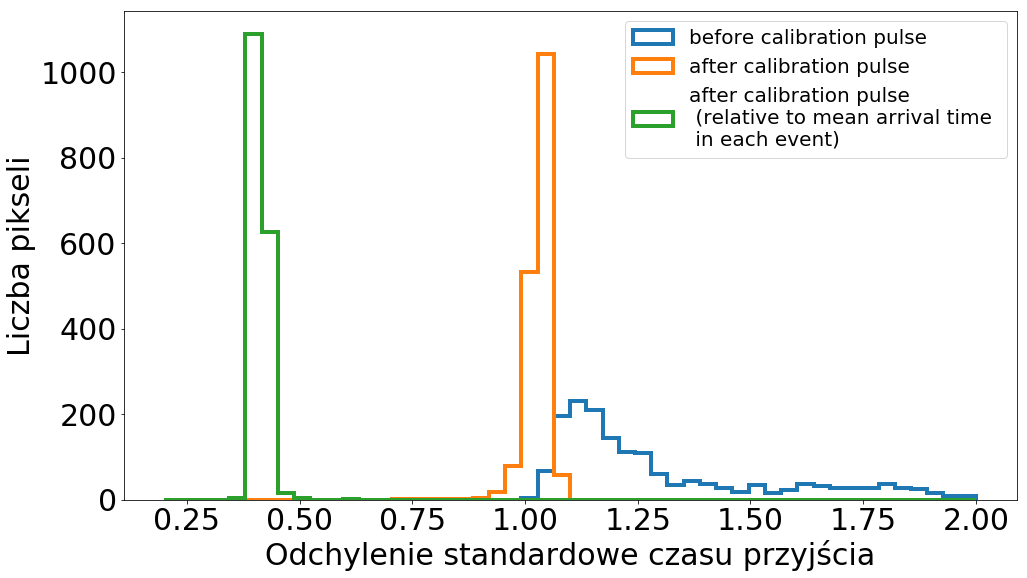

In [80]:
plt.figure(figsize=(16, 9))
plt.hist(std_raw_pulse, bins=50, range=(0.2, 2), histtype='step', lw=4, 
        label="before calibration pulse")
plt.hist(std_corr_pulse, bins=50, range=(0.2, 2), histtype='step', lw=4, 
        label="after calibration pulse")
plt.hist(std_corr_mean_pulse, bins=50, range=(0.2, 2), histtype='step', lw=4,
        label="after calibration pulse \n (relative to mean arrival time \n in each event)")
#plt.yscale('log')
plt.ylabel("Liczba pikseli")
plt.xlabel("Odchylenie standardowe czasu przyjścia")
plt.legend(fontsize=20)

In [46]:
std_raw_pulse_array = np.zeros(1855)
std_corr_pulse_array = np.zeros(1855)
std_corr_mean_pulse_array = np.zeros(1855)
for pixel_id in good_pixels_list:
    print(pixel_id)
    std_arrival = np.std(raw_pulse_list[pixel_id])
    std_corr_arrival = np.std(corr_pulse_list[pixel_id])
    std_corr_mean_arrival = np.std(corr_mean_pulse_list[pixel_id])
    std_raw_pulse_array[pixel_id] = (std_arrival)
    std_corr_pulse_array[pixel_id] = (std_corr_arrival)
    std_corr_mean_pulse_array[pixel_id] = (std_corr_mean_arrival)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

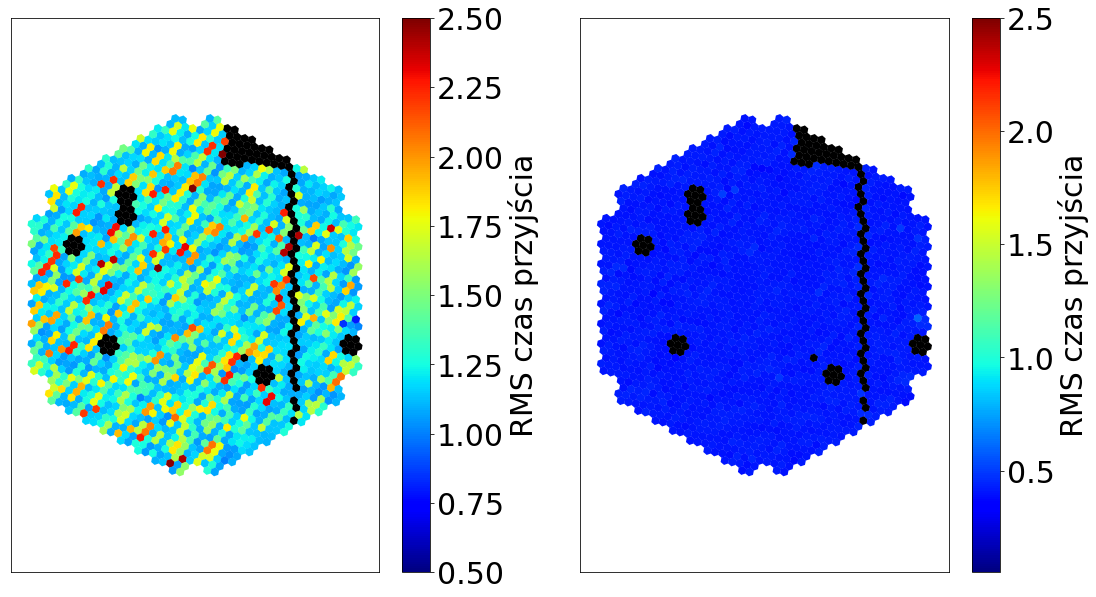

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(16,9))

disp0 = CameraDisplay(ev.inst.subarray.tels[0].camera, ax=ax[0])
disp0.cmap = 'jet'
disp0.image = std_raw_pulse_array
disp0.add_colorbar(ax=ax[0], label="RMS czas przyjścia")
disp0.set_limits_minmax(0.5, 2.5)    
disp0.cmap.set_under('black')        
disp0.cmap.set_under('black')
format_axes(ax[0])

disp0 = CameraDisplay(ev.inst.subarray.tels[0].camera, ax=ax[1])
disp0.cmap = 'jet'
disp0.image = std_corr_mean_pulse_array
disp0.add_colorbar(ax=ax[1], label="RMS czas przyjścia")
disp0.set_limits_minmax(0.05, 2.5)
disp0.cmap.set_under('black')
format_axes(ax[1])
plt.tight_layout()